In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from numpy.linalg import inv

In [2]:
t = np.loadtxt("t_sint.txt")
vp = np.loadtxt("v_sint.txt")
rho = np.loadtxt("rho_sint.txt")

Ip = rho * vp
# plt.figure(figsize=(3, 9))
# plt.plot(Ip, t)
# plt.xlabel('Impedância acústica ($g/cm^{3} * m/s$)', fontsize=12)
# plt.ylabel('Tempo (s)', fontsize=12)

In [3]:
def ricker(f, length=0.128, dt=0.001):
    t = np.arange(-length / 2, (length - dt) / 2, dt)
    wlet = (1.0 - 2.0 * (np.pi**2) * (f**2) * (t**2)) * np.exp(
        -(np.pi**2) * (f**2) * (t**2)
    )

    return t, wlet


twlet, wlet = ricker(f=30, length=0.256, dt=0.004)  # modelagem da wavelet

$\text{refl}(t) = \frac{1}{2}\frac{\mathrm{d} logI_p}{\mathrm{d} t} $

In [4]:
nd = len(Ip)
ns = len(wlet)
S = scipy.linalg.toeplitz(np.append(wlet, np.zeros(2 * nd - ns)), np.zeros(nd))[
    (ns) // 2 : nd + ((ns) // 2)
]

matder = np.zeros(shape=(nd, nd))

for i in range(nd):
    matder[i][i] = -1
    if i < nd - 1:
        matder[i][i + 1] = 1
    else:
        matder[i][i] = 0

refl = 0.5 * matder @ np.log(Ip)
traco = S @ refl

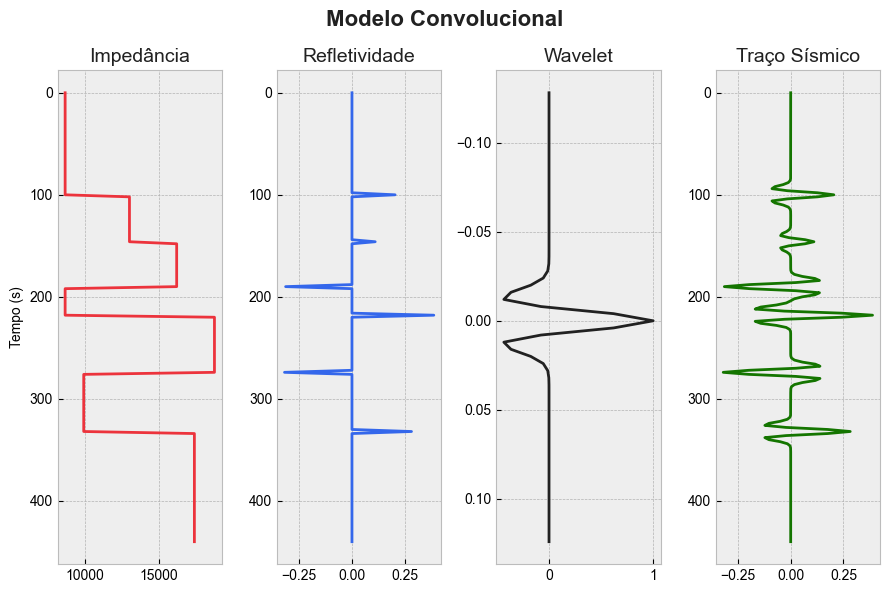

In [9]:
# impedancia, refletividade, convolvido com a wavelet = onda sismica
plt.style.use(["bmh"])

plt.rc("font", family="Arial")
fig, ax = plt.subplots(1, 4, figsize=(9, 6))
plt.suptitle("Modelo Convolucional", fontweight="bold", fontsize=16, color="#212121")

ax[0].plot(Ip, t, color="#ec333c")
ax[0].invert_yaxis()
ax[0].set_ylabel("Tempo (s)", fontsize=10)
ax[0].set_title("Impedância", fontsize=14, color="#212121")

ax[1].plot(refl, t, color="#3467eb")
ax[1].invert_yaxis()
ax[1].set_title("Refletividade", fontsize=14, color="#212121")

ax[2].plot(wlet, twlet, color="#212121")
ax[2].invert_yaxis()
ax[2].set_title("Wavelet", fontsize=14, color="#212121")

ax[3].plot(traco, t, color="#147500")
ax[3].invert_yaxis()
ax[3].set_title("Traço Sísmico", fontsize=14, color="#212121")

plt.tight_layout()
plt.savefig("modelo_direto_edited.svg")
plt.show()
